In [1]:
# Santosh Omprakash
# Project 1 - Wine quality analysis and prediction

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from numpy import mean, std
import scikitplot as skplt

In [3]:
# Read wine dataset
df = pd.read_csv("winequalityN.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Data Preprocessing

As seen above, there are some columns with missing values and they need to be replaced. 

In [5]:
df.loc[:,['fixed acidity','volatile acidity','citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']].info()
df['fixed acidity'].fillna(0, inplace=True)
df['volatile acidity'].fillna(0, inplace=True)
df['citric acid'].fillna(0, inplace=True)
df['residual sugar'].fillna(0, inplace=True)
df['chlorides'].fillna(0, inplace=True)
df['pH'].fillna(0, inplace=True)
df['sulphates'].fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     6487 non-null   float64
 1   volatile acidity  6489 non-null   float64
 2   citric acid       6494 non-null   float64
 3   residual sugar    6495 non-null   float64
 4   chlorides         6495 non-null   float64
 5   pH                6488 non-null   float64
 6   sulphates         6493 non-null   float64
dtypes: float64(7)
memory usage: 355.4 KB


In [6]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Exploratory Data Analysis

C:\Users\oneor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Data distribution by quality')

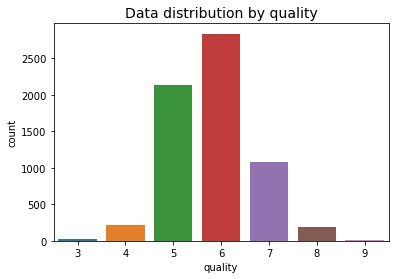

In [8]:
sns.countplot('quality', data=df)
plt.title('Data distribution by quality', fontsize=14)

Quality score ranges from 3 to 9 where 9 is the best quality wine. From above, it can be seen that dataset is imbalanced where majority of the wine data available is of quality between 5 and 7. 

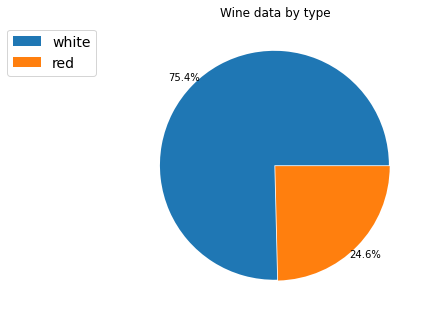

In [9]:
# Check records for wine type

plt.figure(figsize=(6,6))
explode = [0.005] * len(df['type'].unique())
plt.pie(df['type'].value_counts(),
       autopct = '%.1f%%',
       explode = explode, pctdistance=1.1, labeldistance=1.2)
plt.legend(df['type'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Wine data by type')
plt.tight_layout()
plt.show()

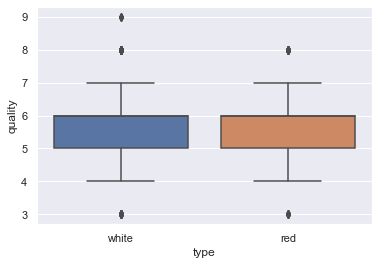

In [10]:
# Box plot of Quality vs Wine type

sns.set(style="darkgrid")
sns.boxplot(x="type",y="quality",data=df)
plt.show()

Quality vs wine type confirms the records available are evenly distribute. Wine type does not have impact on quality 

In [11]:
# Box plots are made to check of outliers

df1 = df[['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol']]
df2 = df[['residual sugar', 'chlorides', 'free sulfur dioxide', 'quality']]
df3 = df[['total sulfur dioxide', 'density', 'pH', 'sulphates']]

<AxesSubplot:>

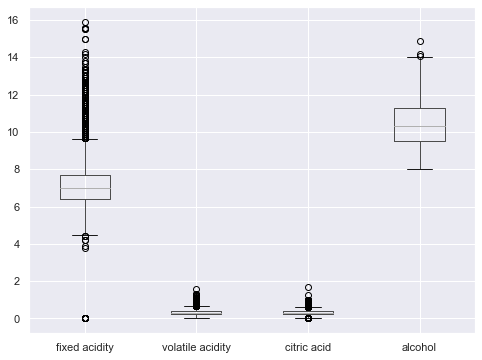

In [12]:
df1.boxplot(figsize=(8,6))

<AxesSubplot:>

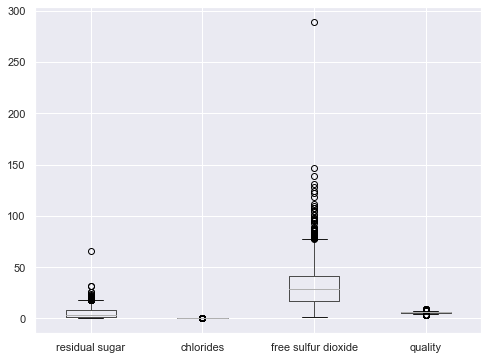

In [13]:
df2.boxplot(figsize=(8,6))

<AxesSubplot:>

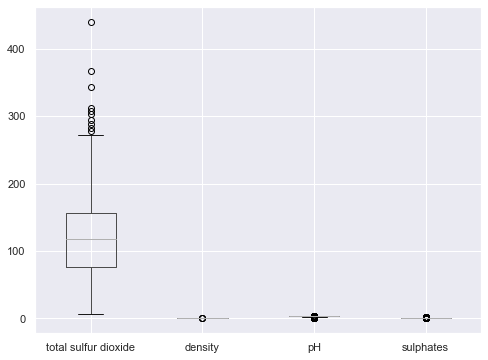

In [14]:
df3.boxplot(figsize=(8,6))

Above shows outliers in fixed acidity, free sulfur dioxide and total sulfur dioxide. Hence, they need to be corrected. 

In [15]:
# Determine minimum and maximum values

min_value = df['free sulfur dioxide'].mean() - 3*df['free sulfur dioxide'].std()
max_value = df['free sulfur dioxide'].mean() + 3*df['free sulfur dioxide'].std()

In [16]:
df4 = df[(df['free sulfur dioxide'] > min_value) & (df['free sulfur dioxide'] < max_value)]

In [17]:
min_value = df['fixed acidity'].mean() - 3*df['fixed acidity'].std()
max_value = df['fixed acidity'].mean() + 3*df['fixed acidity'].std()

In [18]:
min_value, max_value

(3.2266312505920602, 11.184312261798242)

In [19]:
df5 = df4[(df4['fixed acidity'] > min_value) & (df4['fixed acidity'] < max_value)]

In [20]:
min_value = df['total sulfur dioxide'].mean() - 3*df['total sulfur dioxide'].std()
max_value = df['total sulfur dioxide'].mean() + 3*df['total sulfur dioxide'].std()

In [21]:
min_value, max_value

(-53.82098914892836, 285.31013798685353)

In [22]:
df6 = df5[(df5['total sulfur dioxide'] > min_value) & (df5['total sulfur dioxide'] < max_value)]

In [23]:
# Visualizing correlation of features and quality

corr_matrix=df6.corr()

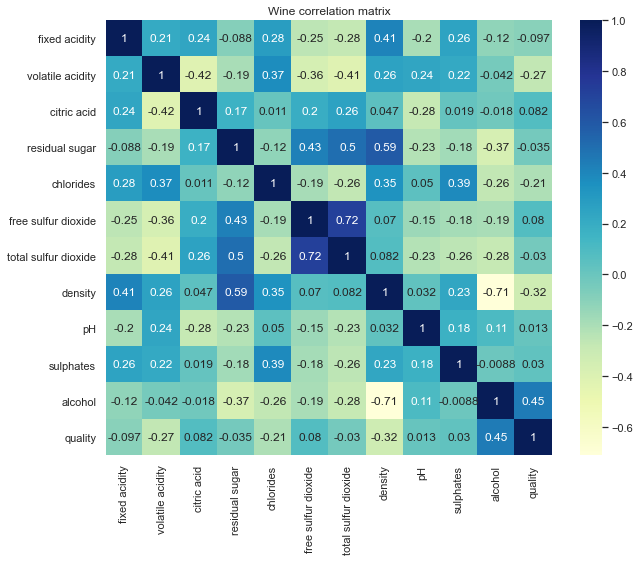

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = df6.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Wine correlation matrix')
plt.show()

In [25]:
df7 = df6.loc[:,df.columns!='type']

In [26]:
df8 = df7.copy()

In [27]:
df8['quality'] = df8['quality'].map({3 : 'average', 4 :'average', 5: 'average',
                                      6: 'good', 7: 'good', 8: 'good', 9:'good'})

In [28]:
df8['quality'].value_counts()

good       3998
average    2320
Name: quality, dtype: int64

In [29]:
# label encode quality

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df8['quality'] = label.fit_transform(df8['quality'])

In [31]:
# Train and Test data

X = df8.loc[:,df7.columns!='quality']
y = df8['quality']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
# Normalization 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

### Model Selection and Evaluation

In [34]:
def model_val(X, y, classifier, scor, show):
    X = np.array(X)
    y = np.array(y)
    scores = cross_val_score(classifier, X, y, scoring=scor)
    return scores.mean()

In [35]:
# List of models

rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sgdc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

,roc_auc
RandomForestClassifier,0.893566
DecisionTreeClassifier,0.749899
SGDClassifier,0.776921
LogisticRegression,0.803719


### Hyperparameter Tuning

In [36]:
# Hyperparameter tuning using Grid Search

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini'], 'max_features': ['sqrt']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           n_jobs = -1)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_features': ['sqrt'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='roc_auc')

In [37]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.9
Best Parameters:  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}


In [38]:
y_pred = grid_search.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_search.predict_proba(X_test_norm)[:,1]
    except:
        y_score = grid_search.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[351 113]
 [104 696]] 

Classification report
              precision    recall  f1-score   support

           0     0.7714    0.7565    0.7639       464
           1     0.8603    0.8700    0.8651       800

    accuracy                         0.8283      1264
   macro avg     0.8159    0.8132    0.8145      1264
weighted avg     0.8277    0.8283    0.8280      1264

Scalar Metrics
        AUROC = 0.9103


Text(0.5, 0, '0 - Average; 1 - Good')

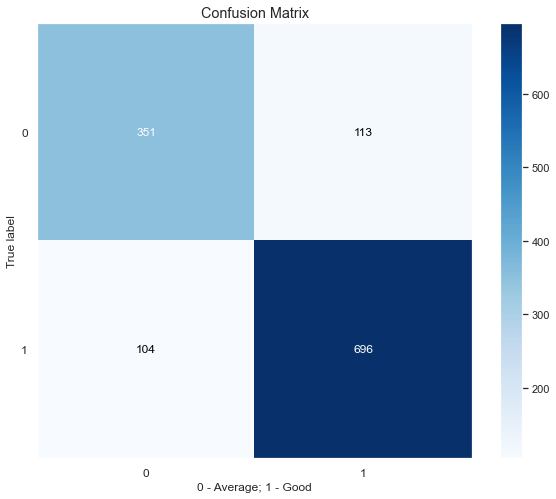

In [39]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xlabel('0 - Average; 1 - Good')